<a href="https://colab.research.google.com/github/FarhahAdel/Bert-pytorch/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
datapath = '/content/drive/MyDrive/bert/IMDB Dataset.csv'
df = pd.read_csv(datapath)
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
pip install transformers

     |████████████████████████████████| 3.5 MB 5.1 MB/s 
     |████████████████████████████████| 596 kB 64.7 MB/s 
     |████████████████████████████████| 895 kB 50.1 MB/s 
     |████████████████████████████████| 67 kB 5.7 MB/s 
     |████████████████████████████████| 6.8 MB 62.9 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import torch
import numpy as np
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-cased')
labels = {'negative':0,
          'positive':1,
          
          }


Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/426k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
class Dataset(torch.utils.data.Dataset):

    def __init__(self, df):

        self.labels = [labels[label] for label in df['sentiment']]
        self.texts = [tokenizer(text, 
                               padding='max_length', max_length = 512, truncation=True,
                                return_tensors="pt") for text in df['review']]

    def classes(self):
        return self.labels

    def __len__(self):
        return len(self.labels)

    def get_batch_labels(self, idx):
        # Fetch a batch of labels
        #return self.label[idx]
        return np.array(self.labels[idx])

    def get_batch_texts(self, idx):
        # Fetch a batch of inputs
        return self.texts[idx]

    def __getitem__(self, idx):
        batch_texts = self.get_batch_texts(idx)
        batch_y = self.get_batch_labels(idx)

        return batch_texts, batch_y

In [ ]:
np.random.seed(112)
df_train, df_val, df_test = np.split(df.sample(frac=1, random_state=42), 
                                     [int(.7*len(df)), int(.8*len(df))])

print(len(df_train),len(df_val), len(df_test))

35000 5000 10000


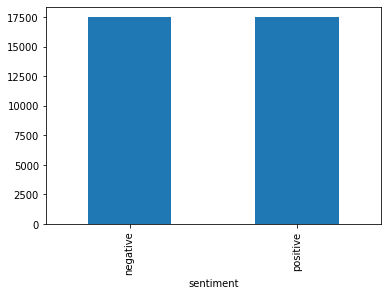

In [ ]:
df_train.groupby(['sentiment']).size().plot.bar()

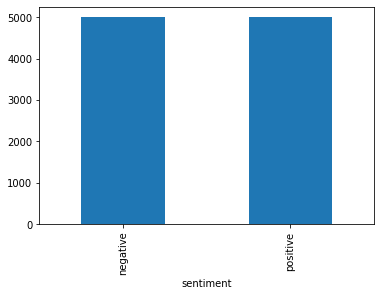

In [ ]:
df_test.groupby(['sentiment']).size().plot.bar()

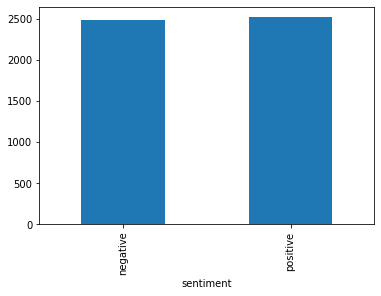

In [ ]:
df_val.groupby(['sentiment']).size().plot.bar()

In [ ]:
df_train_sample = df_train[0:5000]
df_val_sample = df_val[0:500]
df_test_sample = df_train[0:1000]

In [ ]:
from torch.nn.modules import linear
from torch import nn
from transformers import BertModel

class BertClassifier(nn.Module):

    def __init__(self, dropout=0.5):

        super(BertClassifier, self).__init__()

        self.bert = BertModel.from_pretrained('bert-base-cased')
        self.dropout_1 = nn.Dropout(dropout)
        self.linear_1 = nn.Linear(768,512)
        self.dropout_2 = nn.Dropout(dropout)
        self.linear_2 = nn.Linear(512, 256)
        self.dropout_3 = nn.Dropout(dropout)
        self.linear_3 = nn.Linear(256, 128)
        self.dropout_4 = nn.Dropout(dropout)
        self.linear_4= nn.Linear(128, 64)
        self.dropout_5 = nn.Dropout(dropout)
        self.linear_5= nn.Linear(64, 2)
        self.relu = nn.ReLU()

    def forward(self, input_id, mask):

        _, pooled_output = self.bert(input_ids= input_id, attention_mask=mask,return_dict=False)
        dropout_output = self.dropout_1(pooled_output)
        linear_output_1 = self.linear_1(dropout_output)
        dropout_output_1 = self.dropout_2(linear_output_1)
        linear_output_2 = self.linear_2(dropout_output_1)
        dropout_output_2 = self.dropout_3(linear_output_2)
        linear_output_3 = self.linear_3(dropout_output_2)
        dropout_output_3 = self.dropout_4(linear_output_3)
        linear_output_4 = self.linear_4(dropout_output_3)
        dropout_output_4 = self.dropout_5(linear_output_4)
        linear_output_5 = self.linear_5(dropout_output_4)
        final_layer = self.relu(linear_output_5)

        return final_layer

In [ ]:
torch.cuda.memory_summary()


'|===========================================================================|\n|                  PyTorch CUDA memory summary, device ID 0                 |\n|---------------------------------------------------------------------------|\n|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |\n|===========================================================================|\n|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |\n|---------------------------------------------------------------------------|\n| Allocated memory      |       0 B  |       0 B  |       0 B  |       0 B  |\n|       from large pool |       0 B  |       0 B  |       0 B  |       0 B  |\n|       from small pool |       0 B  |       0 B  |       0 B  |       0 B  |\n|---------------------------------------------------------------------------|\n| Active memory         |       0 B  |       0 B  |       0 B  |       0 B  |\n|       from large pool |       0 B  |       0 B  |

In [ ]:
torch.cuda.empty_cache()

In [ ]:
torch.cuda.memory_summary()

'|===========================================================================|\n|                  PyTorch CUDA memory summary, device ID 0                 |\n|---------------------------------------------------------------------------|\n|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |\n|===========================================================================|\n|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |\n|---------------------------------------------------------------------------|\n| Allocated memory      |       0 B  |       0 B  |       0 B  |       0 B  |\n|       from large pool |       0 B  |       0 B  |       0 B  |       0 B  |\n|       from small pool |       0 B  |       0 B  |       0 B  |       0 B  |\n|---------------------------------------------------------------------------|\n| Active memory         |       0 B  |       0 B  |       0 B  |       0 B  |\n|       from large pool |       0 B  |       0 B  |

In [ ]:
import shutil, sys   
def save_ckp(state, is_best, checkpoint_path, best_model_path):
    """
    state: checkpoint we want to save
    is_best: is this the best checkpoint; min validation loss
    checkpoint_path: path to save checkpoint
    best_model_path: path to save best model
    """
    f_path = checkpoint_path
    # save checkpoint data to the path given, checkpoint_path
    torch.save(state, f_path)
    # if it is a best model, min validation loss
    if is_best:
        best_fpath = best_model_path
        # copy that checkpoint file to best path given, best_model_path
        shutil.copyfile(f_path, best_fpath)

In [ ]:
epochs = [1,2,3,4,5]
test_acc =[]
val_acc=[]

from torch.optim import Adam
from tqdm import tqdm

def train(model, train_data, val_data, learning_rate, epochs,checkpoint_path , best_model_path , valid_loss_min_input):
    test_acc.clear()
    val_acc.clear()
    valid_loss_min = valid_loss_min_input 
    train, val = Dataset(train_data), Dataset(val_data)

    train_dataloader = torch.utils.data.DataLoader(train, batch_size=4, shuffle=True)
    val_dataloader = torch.utils.data.DataLoader(val, batch_size=4)

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    criterion = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr= learning_rate)

    if use_cuda:

            model = model.cuda()
            criterion = criterion.cuda()

    for epoch_num in range(epochs):

            total_acc_train = 0
            total_loss_train = 0

            for train_input, train_label in tqdm(train_dataloader):

                train_label = train_label.to(device)
                mask = train_input['attention_mask'].to(device)
                input_id = train_input['input_ids'].squeeze(1).to(device)

                output = model(input_id, mask)
                # train_label_squeeze = train_label
                # train_label = train_label.unsqueeze(1)
                # train_label = train_label.float()
                batch_loss = criterion(output, train_label)
                total_loss_train += batch_loss.item()
                
                acc = (output.argmax(dim=1) == train_label).sum().item()
                total_acc_train += acc
              

             
                model.zero_grad()
                batch_loss.backward()
                optimizer.step()
            
            total_acc_val = 0
            total_loss_val = 0

            with torch.no_grad():

                for val_input, val_label in val_dataloader:

                    val_label = val_label.to(device)
                    mask = val_input['attention_mask'].to(device)
                    input_id = val_input['input_ids'].squeeze(1).to(device)

                    output = model(input_id, mask)
                    # val_label_squeeze = val_label
                    # val_label = val_label.unsqueeze(1)
                    # val_label = val_label.float()
                    batch_loss = criterion(output, val_label)
                    total_loss_val += batch_loss.item()
                    
                    acc = (output.argmax(dim=1) == val_label).sum().item()
                    total_acc_val += acc
            
            print(
                f'Epochs: {epoch_num + 1} | Train Loss: {total_loss_train / len(train_data): .3f} \
                | Train Accuracy: {total_acc_train / len(train_data): .3f} \
                | Val Loss: {total_loss_val / len(val_data): .3f} \
                | Val Accuracy: {total_acc_val / len(val_data): .3f}')
            test_acc.append(total_acc_train / len(train_data))
            val_acc.append(total_acc_val / len(val_data))
          
            valid_loss = total_loss_val/len(val_data)
            checkpoint = {
                'epoch': epoch_num + 1,
                'valid_loss_min': valid_loss,
                'state_dict': model.state_dict(),
                'optimizer': optimizer.state_dict(),
                'learning_rate': learning_rate
                }
            save_ckp(checkpoint, False, checkpoint_path, best_model_path)

            if valid_loss <= valid_loss_min:
              print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,valid_loss))
              # save checkpoint as best model
              save_ckp(checkpoint, True, checkpoint_path, best_model_path)
              valid_loss_min = valid_loss
                  
EPOCHS = 5
model = BertClassifier()
LR = 1e-6
checkpoint_path = '/content/drive/MyDrive/bert/checkpoints/check.pt'
best_model = '/content/drive/MyDrive/bert/bestmodel/model.pt'

# checkpoint_path_1 = '/content/drive/MyDrive/bert/checkpoints/check.pt'
# best_model_1 = '/content/drive/MyDrive/bert/bestmodel/model.pt'  
# checkpoint_path_2 = '/content/drive/MyDrive/bert/checkpoints/check.pt'
# best_model_2 = '/content/drive/MyDrive/bert/bestmodel/model.pt' 



Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
import matplotlib.pyplot as plt

train(model, df_train, df_val, LR, EPOCHS,checkpoint_path, best_model, np.Inf)
  # plt.xlabel("epochs")
  # plt.ylabel("accuracy")
  # plt.plot(epochs,test_acc,color="red")
  # plt.plot(epochs, val_acc,color="blue")

  # plt.legend(["test accuracy", "validation accuracy"])

100%|██████████| 8750/8750 [1:00:01<00:00,  2.43it/s]


Epochs: 1 | Train Loss:  0.146                 | Train Accuracy:  0.683                 | Val Loss:  0.085                 | Val Accuracy:  0.903
Validation loss decreased (inf --> 0.084555).  Saving model ...


100%|██████████| 8750/8750 [1:00:48<00:00,  2.40it/s]


Epochs: 2 | Train Loss:  0.065                 | Train Accuracy:  0.917                 | Val Loss:  0.061                 | Val Accuracy:  0.914
Validation loss decreased (0.084555 --> 0.061148).  Saving model ...


100%|██████████| 8750/8750 [1:00:52<00:00,  2.40it/s]


Epochs: 3 | Train Loss:  0.046                 | Train Accuracy:  0.942                 | Val Loss:  0.058                 | Val Accuracy:  0.917
Validation loss decreased (0.061148 --> 0.058421).  Saving model ...


100%|██████████| 8750/8750 [1:00:54<00:00,  2.39it/s]


Epochs: 4 | Train Loss:  0.033                 | Train Accuracy:  0.962                 | Val Loss:  0.057                 | Val Accuracy:  0.927
Validation loss decreased (0.058421 --> 0.056802).  Saving model ...


100%|██████████| 8750/8750 [1:00:55<00:00,  2.39it/s]


Epochs: 5 | Train Loss:  0.022                 | Train Accuracy:  0.978                 | Val Loss:  0.064                 | Val Accuracy:  0.927


In [ ]:

def load_ckp(checkpoint_fpath, model, optimizer):
    """
    checkpoint_path: path to save checkpoint
    model: model that we want to load checkpoint parameters into       
    optimizer: optimizer we defined in previous training
    """
    # load check point
    checkpoint = torch.load(checkpoint_fpath)
    # initialize state_dict from checkpoint to model
    model.load_state_dict(checkpoint['state_dict'])
    # initialize optimizer from checkpoint to optimizer
    optimizer.load_state_dict(checkpoint['optimizer'])
    # initialize valid_loss_min from checkpoint to valid_loss_min
    valid_loss_min = checkpoint['valid_loss_min']
    lr =  checkpoint['learning_rate']
    # return model, optimizer, epoch value, min validation loss , lr
    return model, optimizer, checkpoint['epoch'], valid_loss_min , lr

In [ ]:
optimizer = Adam(model.parameters(), lr=  1e-6)
model , optmizer , epoch, valid_loss , lr=  load_ckp(checkpoint_path, model,optimizer)
print(valid_loss)
print(epoch)
print(lr)


0.06448838806968415
5
1e-06


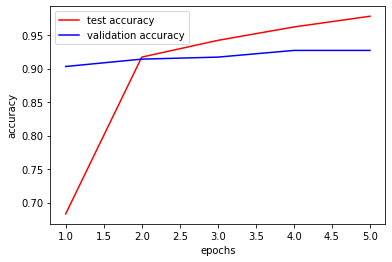

In [ ]:
  plt.xlabel("epochs")
  plt.ylabel("accuracy")
  plt.plot(epochs,test_acc,color="red")
  plt.plot(epochs, val_acc,color="blue")

  plt.legend(["test accuracy", "validation accuracy"])

In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import multilabel_confusion_matrix as mcm ,  classification_report
pred_labels =[]
test_labels=[]
def evaluate(model, test_data):

    test = Dataset(test_data)
    test_dataloader = torch.utils.data.DataLoader(test, batch_size=2)

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    if use_cuda:

        model = model.cuda()

    total_acc_test = 0
    with torch.no_grad():

        for test_input, test_label in test_dataloader:
              # print(test_label)
              test_label = test_label.to(device)
              
              mask = test_input['attention_mask'].to(device)
              input_id = test_input['input_ids'].squeeze(1).to(device)

              output = model(input_id, mask)
              acc = (output.argmax(dim=1) == test_label).sum().item()
              total_acc_test += acc
             
            
              test_labels.append(test_label.cpu().numpy()[0])
              test_labels.append(test_label.cpu().numpy()[1])
              pred_labels.append(output.argmax(dim=1).cpu().numpy()[0])
              pred_labels.append(output.argmax(dim=1).cpu().numpy()[1])
         
    print("testo = ",test_labels)
    print("predso = ",pred_labels)
    print(f'Test Accuracy: {total_acc_test / len(test_data): .3f}')
evaluate(model, df_test)

testo =  [0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 

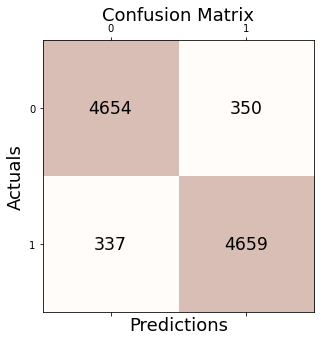

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(test_labels, pred_labels)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
print(classification_report(test_labels, pred_labels))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      5004
           1       0.93      0.93      0.93      4996

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000

